In [3]:
import mysql.connector

try:
    connection = mysql.connector.connect(
        host="127.0.0.1",
        database="project",
        user="root",
        password="root"
    )
    
    if connection.is_connected():
        print("Connection is open!")
    else:
        print("Connection is closed!")

except mysql.connector.Error as e:
    print("Error while connecting to MySQL:", e)



Connection is open!


In [6]:
import pandas as pd  # Import Pandas

# Load CSV File
csv_file = "D:/project for resume/myntra_sales_dataset.csv"  # Update with your correct file path
myntra_sales = pd.read_csv(csv_file)

# Display first few rows
print(myntra_sales.head())


   Order_ID Product_Name Category  Price  Discount_Percentage  Quantity_Sold  \
0         1       Jacket    Women   4083                   13              4   
1         2       Shorts      Men   1872                   47              3   
2         3        Jeans      Men   3132                   26              1   
3         4       Jacket      Men   1815                   26              2   
4         5      T-Shirt      Men   4425                   31              2   

   Total_Sale_Value    Payment_Method  Customer_Rating     City  
0          14208.84  Cash on Delivery              3.1  Chennai  
1           2976.48  Cash on Delivery              4.0   Mumbai  
2           2317.68               UPI              4.1  Kolkata  
3           2686.20       Credit Card              3.9  Kolkata  
4           6106.50        Debit Card              4.5   Mumbai  


In [41]:
# Print summary statistics of the dataset
print(myntra_sales.describe())
total_quantity_sold = myntra_sales["Quantity_Sold"].sum()
print("Total Quantity Sold:", total_quantity_sold)


          Order_ID        Price  Discount_Percentage  Quantity_Sold  \
count  2000.000000  2000.000000          2000.000000    2000.000000   
mean   1000.500000  2785.680500            27.448000       2.921500   
std     577.494589  1306.589333            13.140724       1.416454   
min       1.000000   500.000000             5.000000       1.000000   
25%     500.750000  1666.750000            16.000000       2.000000   
50%    1000.500000  2790.000000            28.000000       3.000000   
75%    1500.250000  3939.000000            39.000000       4.000000   
max    2000.000000  5000.000000            50.000000       5.000000   

       Total_Sale_Value  Customer_Rating  
count       2000.000000      2000.000000  
mean        5925.927970         4.015200  
std         4418.584123         0.574103  
min          270.000000         3.000000  
25%         2453.050000         3.500000  
50%         4655.775000         4.000000  
75%         8516.685000         4.500000  
max        23484

In [8]:
# Show dataset information
myntra_sales.info()

# Show the shape of the dataset
print(myntra_sales.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_ID             2000 non-null   int64  
 1   Product_Name         2000 non-null   object 
 2   Category             2000 non-null   object 
 3   Price                2000 non-null   int64  
 4   Discount_Percentage  2000 non-null   int64  
 5   Quantity_Sold        2000 non-null   int64  
 6   Total_Sale_Value     2000 non-null   float64
 7   Payment_Method       2000 non-null   object 
 8   Customer_Rating      2000 non-null   float64
 9   City                 2000 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 156.4+ KB
(2000, 10)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


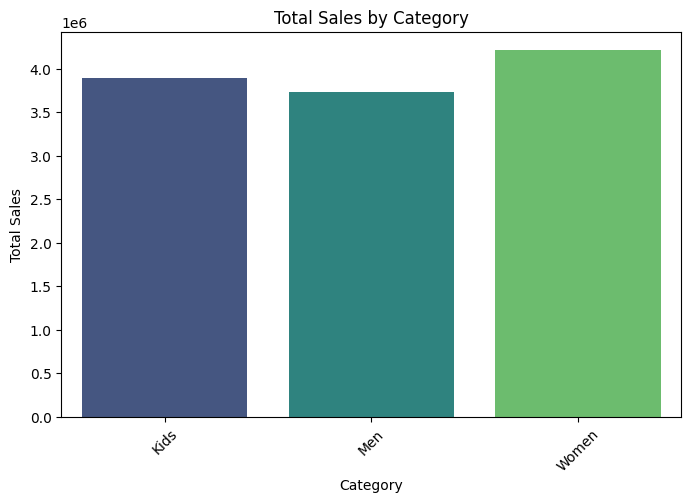

In [76]:
#1.Group data to calculate the total sales for each product category
category_sales = myntra_sales.groupby("Category")["Total_Sale_Value"].sum().reset_index()

# Create a bar plot to visualize total sales by category
plt.figure(figsize=(8, 5))  # Set figure size

sns.barplot(x="Category", y="Total_Sale_Value", data=category_sales, 
            palette="viridis", hue="Category", legend=False)  # Explicitly setting hue (not needed if legend=False)

plt.title("Total Sales by Category")  # Set plot title
plt.xlabel("Category")  # Label for x-axis
plt.ylabel("Total Sales")  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


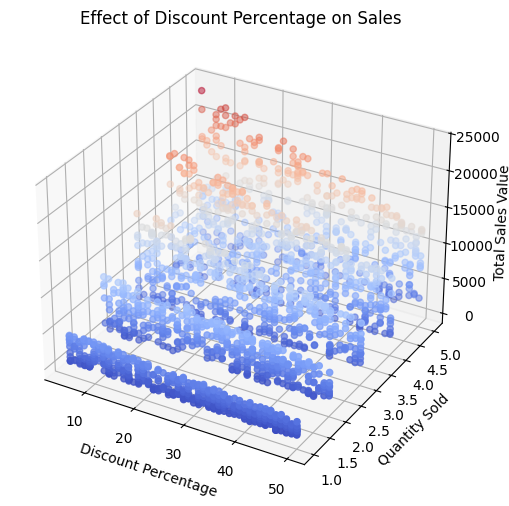

In [77]:
#2.Scatter plot in 3D with color mapping based on total sales value
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting module
# Create a 3D figure
fig = plt.figure(figsize=(10, 6))  # Set figure size
ax = fig.add_subplot(111, projection="3d")  # Add a 3D subplot

# Extract values for plotting
x = myntra_sales["Discount_Percentage"]  # X-axis: Discount Percentage
y = myntra_sales["Quantity_Sold"]  # Y-axis: Quantity Sold
z = myntra_sales["Total_Sale_Value"]  # Z-axis: Total Sales Value

ax.scatter(x, y, z, c=z, cmap="coolwarm", marker="o")

# Set axis labels
ax.set_xlabel("Discount Percentage")  
ax.set_ylabel("Quantity Sold")  
ax.set_zlabel("Total Sales Value")  

# Set title
ax.set_title("Effect of Discount Percentage on Sales")

# Display the plot
plt.show()


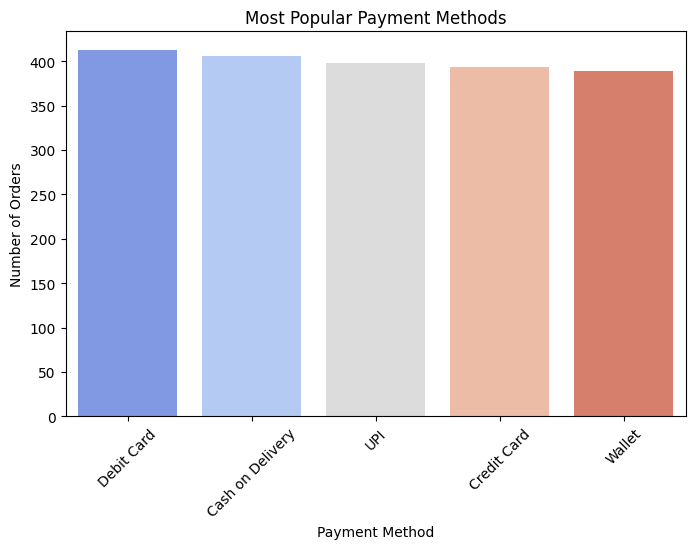

In [33]:
# 3.Group by Payment Method
payment_counts = myntra_sales["Payment_Method"].value_counts().reset_index()
payment_counts.columns = ["Payment_Method", "Count"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Payment_Method", y="Count", data=payment_counts, 
            palette="coolwarm", hue="Payment_Method", legend=False)  # Explicitly setting hue

plt.title("Most Popular Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


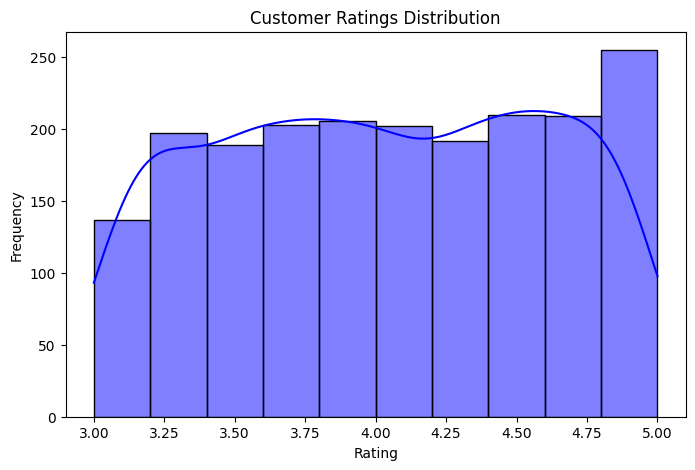

In [25]:
# 4.Plot Customer Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(myntra_sales["Customer_Rating"], bins=10, kde=True, color="blue")
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


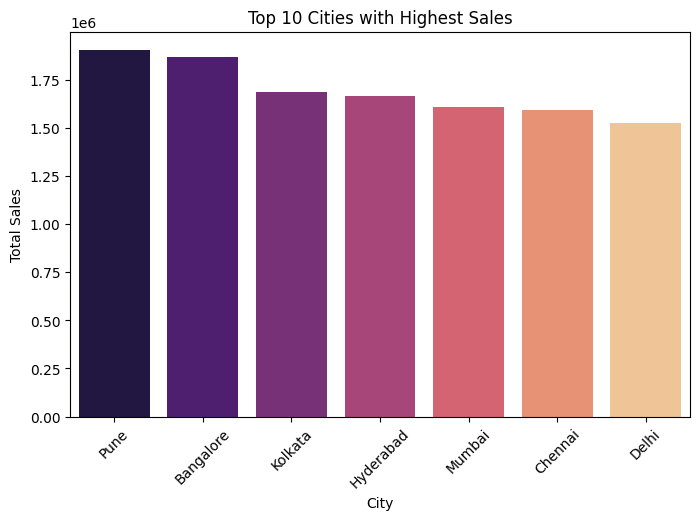

In [34]:
# 5.Group by City
city_sales = myntra_sales.groupby("City")["Total_Sale_Value"].sum().reset_index()
city_sales = city_sales.sort_values(by="Total_Sale_Value", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="City", y="Total_Sale_Value", data=city_sales.head(10), 
            palette="magma", hue="City", legend=False)  # Fix for Seaborn v0.14.0+

plt.title("Top 10 Cities with Highest Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


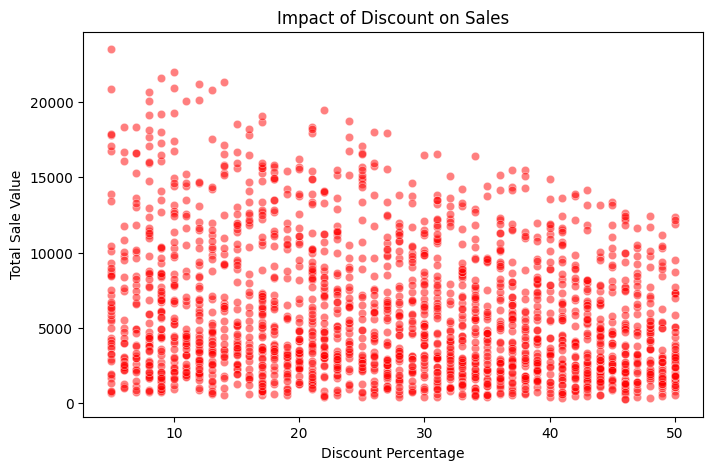

In [40]:
# 6.Relationship Between Discount and Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Discount_Percentage", y="Total_Sale_Value", data=myntra_sales, alpha=0.5, color="red")
plt.title("Impact of Discount on Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Total Sale Value")
plt.show()


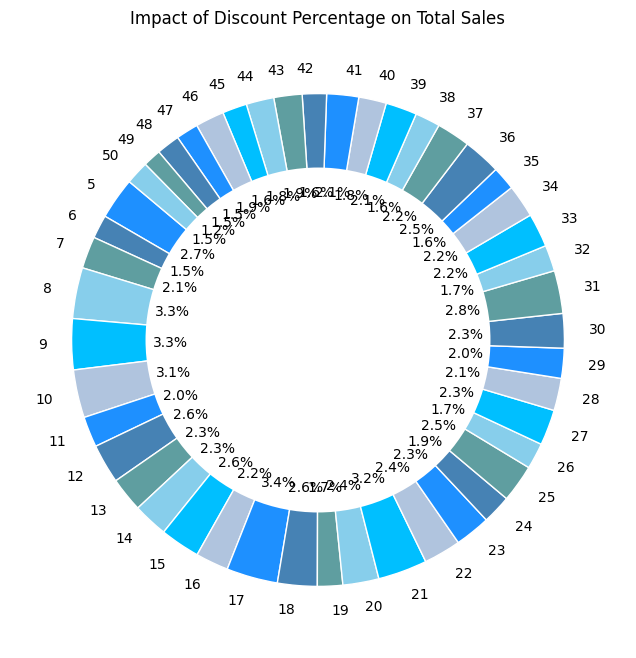

In [54]:
import matplotlib.pyplot as plt

# 7.Group by Discount Percentage
discount_sales = myntra_sales.groupby("Discount_Percentage")["Total_Sale_Value"].sum()

# Define color palette (shades of blue)
colors = ["#1E90FF", "#4682B4", "#5F9EA0", "#87CEEB", "#00BFFF", "#B0C4DE"]

# Plot Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(discount_sales, labels=discount_sales.index, autopct="%1.1f%%", startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Impact of Discount Percentage on Total Sales")
plt.show()


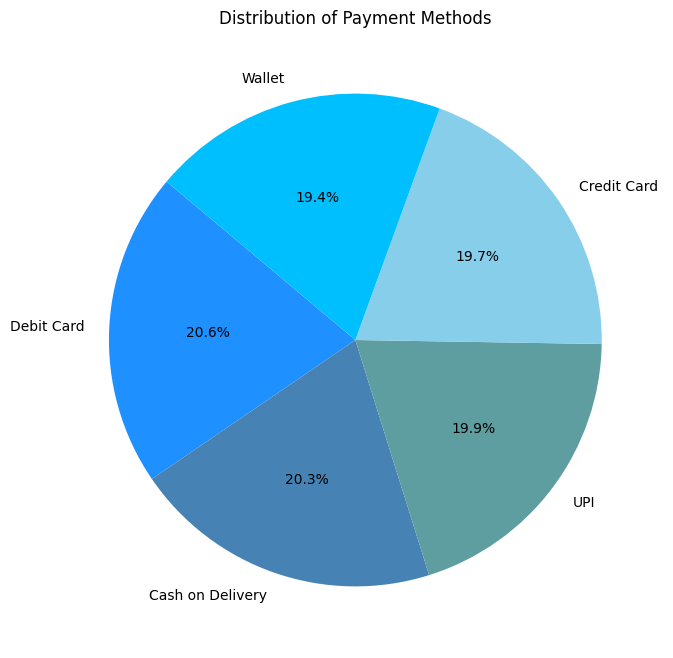

In [53]:
# 8.Group by Payment Method
payment_counts = myntra_sales["Payment_Method"].value_counts()

# Define blue shades for colors
colors = ["#1E90FF", "#4682B4", "#5F9EA0", "#87CEEB", "#00BFFF", "#B0C4DE"]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Distribution of Payment Methods")
plt.show()


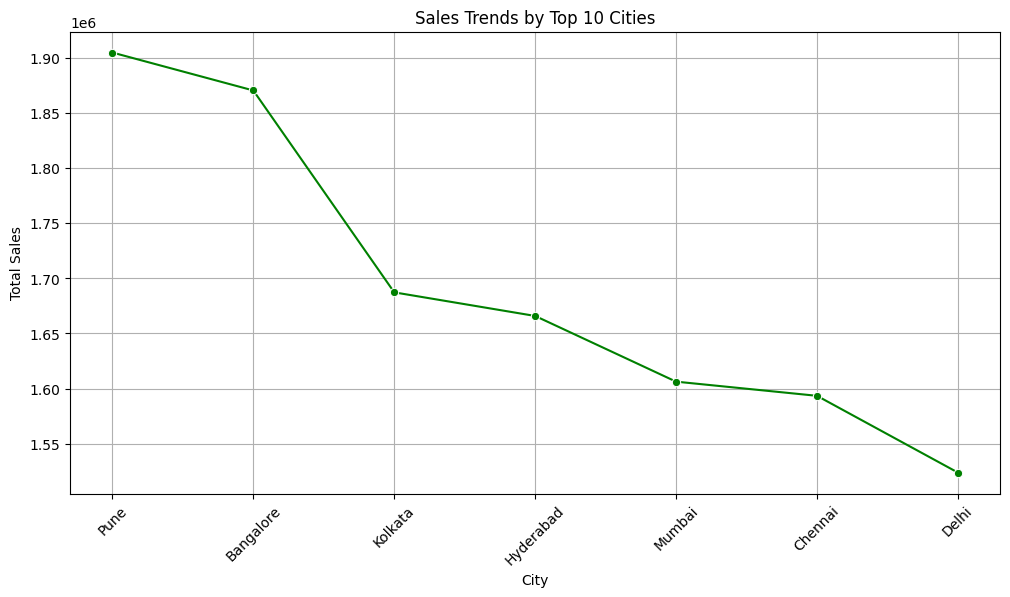

In [62]:
# 9.Group data by City
city_sales_trend = myntra_sales.groupby("City")["Total_Sale_Value"].sum().reset_index()

# Sort cities by total sales
city_sales_trend = city_sales_trend.sort_values(by="Total_Sale_Value", ascending=False)

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="City", y="Total_Sale_Value", data=city_sales_trend.head(10), marker="o", color="green")
plt.title("Sales Trends by Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


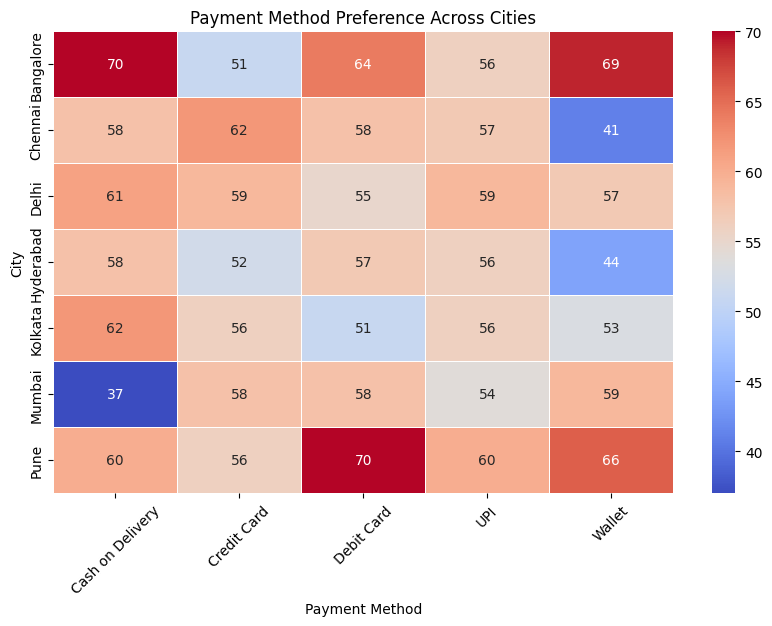

In [46]:
# 10.Group by City and Payment Method
city_payment = myntra_sales.groupby(["City", "Payment_Method"])["Order_ID"].count().reset_index()

# Pivot the data
city_payment_pivot = city_payment.pivot(index="City", columns="Payment_Method", values="Order_ID").fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(city_payment_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Payment Method Preference Across Cities")
plt.xlabel("Payment Method")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.show()
